##### Yu Han May, 2023
Copairs is adopted to answer two questions:
1. can you retrieve replicates from non-replicates based on Metadata_Sample_Unique are replicates. 
2. can you retrieve mutant for the same wild type from the wild type itself.

In [1]:
import pandas as pd
import numpy as np
from copairs.map import aggregate
from copairs.map import run_pipeline
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#read profile
df_p1=pd.read_csv('../../varchamp_profiles/2023_02_23_Batch_3/2022_10_11_PPL9_P1/2022_10_11_PPL9_P1_normalized_feature_select_batch.csv.gz')
df_p2=pd.read_csv('../../varchamp_profiles/2023_02_23_Batch_3/2022_09_29_PPL9_P2/2022_09_29_PPL9_P2_normalized_feature_select_batch.csv.gz')
df_p3=pd.read_csv('../../varchamp_profiles/2023_02_23_Batch_3/2022_09_29_PPL9_P3/2022_09_29_PPL9_P3_normalized_feature_select_batch.csv.gz')
#read metadata
df_metadata=pd.read_csv('../../varchamp_profiles/2023_02_23_Batch_3.csv')
df_metadata.head(2)

,Metadata_Well,384_ID,entryID,Symbol,entry_plate.x,entry_well.x,entry_numb,dest_plate_96,dest_well_96,dest_numb_96,...,r384,c384,Metadata_Plate,batch,control,Gene,MT,Variant,Metadata_Sample_Unique,Metadata_batch_Plate
0,A01,1_1,DisWTGDEh03_F06,ACSF3,DisWTGDEh03,F06,46.0,FVrry_P01_Q01,A01,1.0,...,1.0,1.0,2022_10_11_PPL9_P1,2023_02_23_Batch_3,False,ACSF3,NaN,ACSF3,ACSF3,2023_02_23_Batch_3-2022_10_11_PPL9_P1
1,C01,3_1,VUSmut_GDEh03_A02,ACSF3,VUSmut_GDEh03,A02,9.0,FVrry_P01_Q01,B01,2.0,...,3.0,1.0,2022_10_11_PPL9_P1,2023_02_23_Batch_3,False,ACSF3,Ala197Thr,ACSF3 Ala197Thr,ACSF3 Ala197Thr,2023_02_23_Batch_3-2022_10_11_PPL9_P1


In [3]:
#concatenate df_p1, df_p2, df_p3
df=pd.concat([df_p1,df_p2,df_p3],axis=0)
#remove Metadata_Symbol=516-TC in df
df_profile=df[df['Metadata_Symbol']!='516 - TC']
df_profile.head(2)

,Metadata_384_ID,Metadata_entryID,Metadata_Symbol,Metadata_entry_plate.x,Metadata_entry_well.x,Metadata_entry_numb,Metadata_dest_plate_96,Metadata_dest_well_96,Metadata_dest_numb_96,Metadata_orf_id,...,Nuclei_Texture_SumEntropy_DNA_20_01_256,Nuclei_Texture_SumEntropy_DNA_20_02_256,Nuclei_Texture_SumEntropy_DNA_20_03_256,Nuclei_Texture_SumVariance_AGP_20_02_256,Nuclei_Texture_SumVariance_DNA_20_01_256,Nuclei_Texture_SumVariance_DNA_20_02_256,Nuclei_Texture_SumVariance_DNA_20_03_256,Nuclei_Texture_SumVariance_GFP_5_01_256,Nuclei_Texture_SumVariance_Mito_20_03_256,Nuclei_Texture_Variance_AGP_10_00_256
0,1_1,DisWTGDEh03_F06,ACSF3,DisWTGDEh03,F06,46.0,FVrry_P01_Q01,A01,1.0,71337.0,...,-1.6834,-1.84680,-1.56960,-0.43763,-1.05170,-1.06410,-0.99208,-0.59723,0.94397,-0.54754
1,3_1,VUSmut_GDEh03_A02,ACSF3,VUSmut_GDEh03,A02,9.0,FVrry_P01_Q01,B01,2.0,71337.0,...,0.1716,0.42315,0.38591,-0.64088,0.37808,0.38868,1.27990,-0.65973,4.86160,-0.73677


In [4]:
#merge Gene, MT, and Metadata_Sample_Unique from df_metadata to df_profile 
#based on columns of Metadata_Well and Metadata_Plate
df_merge=df_profile.merge(df_metadata[['Metadata_Well','Metadata_Plate','Gene','MT','Metadata_Sample_Unique']],on=['Metadata_Well','Metadata_Plate'],how='left')
#change Gene to Metadata_Gene and MT to Metadata_MT
df_merge.rename(columns={'Gene':'Metadata_Gene','MT':'Metadata_MT'},inplace=True)
#add a column of Metadata_type where if Metadata_MT is NaN, Metadata_type is 'WT', otherwise 'MT'
df_merge['Metadata_type']=np.where(df_merge['Metadata_MT'].isnull(),'WT','MT')
df_merge

,Metadata_384_ID,Metadata_entryID,Metadata_Symbol,Metadata_entry_plate.x,Metadata_entry_well.x,Metadata_entry_numb,Metadata_dest_plate_96,Metadata_dest_well_96,Metadata_dest_numb_96,Metadata_orf_id,...,Nuclei_Texture_SumVariance_DNA_20_01_256,Nuclei_Texture_SumVariance_DNA_20_02_256,Nuclei_Texture_SumVariance_DNA_20_03_256,Nuclei_Texture_SumVariance_GFP_5_01_256,Nuclei_Texture_SumVariance_Mito_20_03_256,Nuclei_Texture_Variance_AGP_10_00_256,Metadata_Gene,Metadata_MT,Metadata_Sample_Unique,Metadata_type
0,1_1,DisWTGDEh03_F06,ACSF3,DisWTGDEh03,F06,46.0,FVrry_P01_Q01,A01,1.0,71337.0,...,-1.05170,-1.06410,-0.99208,-0.59723,0.94397,-0.54754,ACSF3,NaN,ACSF3,WT
1,3_1,VUSmut_GDEh03_A02,ACSF3,VUSmut_GDEh03,A02,9.0,FVrry_P01_Q01,B01,2.0,71337.0,...,0.37808,0.38868,1.27990,-0.65973,4.86160,-0.73677,ACSF3,Ala197Thr,ACSF3 Ala197Thr,MT
2,5_1,VUSmut_GDEh03_A03,ACSF3,VUSmut_GDEh03,A03,17.0,FVrry_P01_Q01,C01,3.0,71337.0,...,1.82830,1.52710,0.44437,-0.54998,0.56700,-0.39401,ACSF3,Thr358Ile,ACSF3 Thr358Ile,MT
3,7_1,VUSmut_GDEh03_B02,ACSF3,VUSmut_GDEh03,B02,10.0,FVrry_P01_Q01,D01,4.0,71337.0,...,0.58927,0.74548,0.99458,-0.66037,0.75209,-0.60970,ACSF3,Met198Arg,ACSF3 Met198Arg,MT
4,9_1,VUSmut_GDEh03_B03,ACSF3,VUSmut_GDEh03,B03,18.0,FVrry_P01_Q01,E01,5.0,71337.0,...,2.12130,2.99960,2.59140,-0.63411,7.67400,0.58209,ACSF3,Glu359Lys,ACSF3 Glu359Lys,MT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1072,8_24,VUSmut_GDEh05_E08,FAM161A,VUSmut_GDEh05,E08,61.0,FVrry_P01_Q04,D12,92.0,53030.0,...,4.27280,6.18110,2.64710,-0.67444,-0.62642,-0.73048,FAM161A,Leu269Arg,FAM161A Leu269Arg,MT
1073,10_24,DisWTGDEh02_B02,FAM187A,DisWTGDEh02,B02,10.0,FVrry_P01_Q04,E12,93.0,13597.0,...,2.56540,3.15310,1.33550,-0.67310,-0.71484,-0.31127,FAM187A,NaN,FAM187A,WT
1074,12_24,DisWTGDEh02_G05,FASLG,DisWTGDEh02,G05,39.0,FVrry_P01_Q04,F12,94.0,7630.0,...,0.76857,2.99790,0.98006,-0.66480,-0.65230,-0.84207,FASLG,NaN,FASLG,WT
1075,14_24,DisWTGDEh02_D10,FBP1,DisWTGDEh02,D10,76.0,FVrry_P01_Q04,G12,95.0,2654.0,...,-0.36526,-0.37485,-0.43034,0.22254,-0.77972,-1.05710,FBP1,NaN,FBP1,WT


In [5]:
#extract meta and feat columns
meta_cols = [c for c in df_merge.columns if c.startswith('Meta')]
feat_cols = [c for c in df_merge.columns if not c.startswith('Meta')]
meta = df_merge[meta_cols]
feats = df_merge[feat_cols].values

#### retrieve replicates from non replicates

In [6]:
#pos is what you are matching on
#sameby is what condition shall be the same (e.g., same perturbation, same target)
pos_sameby = ['Metadata_Sample_Unique']
#diffby is what condition shall be different (e.g., different plate)
pos_diffby = []

#neg is what you are matching against
#sameby is barely used unless you want to limit the sample, e.g., only against control in the ssame plate
neg_sameby = []
#diffby is what condition shall be different (e.g., control vs. non control)
neg_diffby = ['Metadata_Sample_Unique']
null_size = 10000

In [7]:
tech_result = run_pipeline(meta, feats, pos_sameby, pos_diffby, neg_sameby, neg_diffby, null_size)
#combine scores from samples with the same Metadata_Sample_Unique
tech_result_agg=aggregate(tech_result, 'Metadata_Sample_Unique', threshold=0.05)
tech_result_agg[['above_p_threshold', 'above_q_threshold']].value_counts()

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

above_p_threshold  above_q_threshold
True               True                 154
False              False                141
True               False                 51
Name: count, dtype: int64

#### retrieve mutants from its WT

In [8]:
pos_sameby = ['Metadata_Gene']
pos_diffby = ['Metadata_type']
neg_sameby = []
neg_diffby = ['Metadata_Gene']
null_size = 10000

In [9]:
bio_result = run_pipeline(meta, feats, pos_sameby, pos_diffby, neg_sameby, neg_diffby, null_size)
bio_result_agg=aggregate(bio_result, 'Metadata_Sample_Unique', threshold=0.05)
bio_result_agg[['above_p_threshold', 'above_q_threshold']].value_counts()


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

above_p_threshold  above_q_threshold
False              False                159
True               True                 150
                   False                 37
Name: count, dtype: int64

#### plot

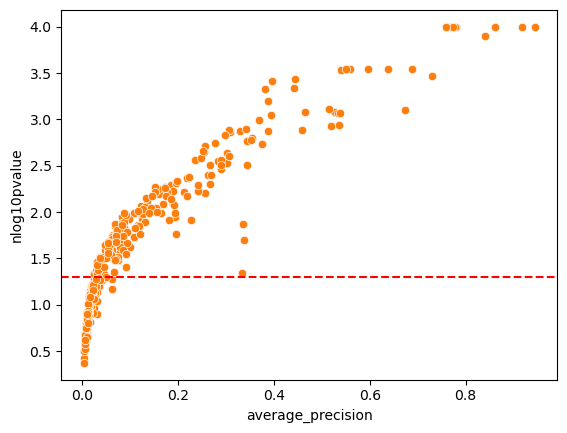

In [12]:
#plot scatter plot using seaborn
sns.scatterplot(data=tech_result_agg, x="average_precision", y="nlog10pvalue")
plt.axhline(y=-np.log10(0.05), color='r', linestyle='--')
plt.show()

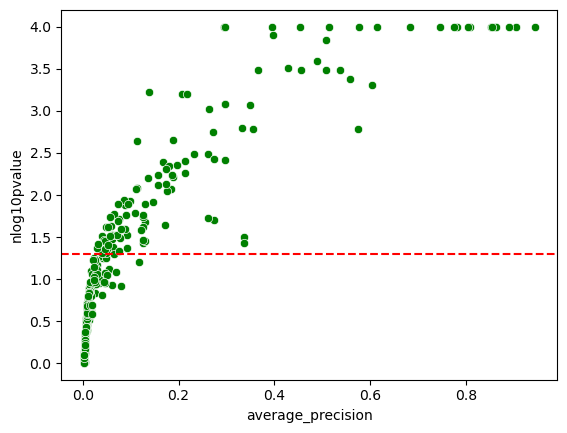

In [14]:
#plot scatter plot using seaborn
sns.scatterplot(data=bio_result_agg, x="average_precision", y="nlog10pvalue", color='g')
plt.axhline(y=-np.log10(0.05), color='r', linestyle='--')
plt.show()